***FAKE and TRUE NEWS TEXT DETECTION ***

**UNZIP FILE**

In [1]:
import zipfile
import os

zip_path = '/content/archive (text).zip'  # Update with your path if needed
extract_dir = 'TEXT DATA'  # Folder to extract files

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
print("Extracted files:", os.listdir(extract_dir))

Extracted files: ['Fake.csv', 'True.csv']


In [2]:
import pandas as pd

# Load the 'true.csv' and 'fake.csv' files into DataFrames
true_df = pd.read_csv('/content/TEXT DATA/True.csv')
fake_df = pd.read_csv('/content/TEXT DATA/Fake.csv')

# Add a label column
true_df['label'] = 'real'
fake_df['label'] = 'fake'

# Concatenate the two DataFrames
df = pd.concat([true_df, fake_df], ignore_index=True)

**SHAPE OF DATASET**

In [3]:
print("Shape of dataset:", df.shape)

Shape of dataset: (44898, 5)


**SHOW 5 ROWS IN DATASET**

In [4]:
# Show the first few rows of the combined dataset
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


**SHOW 5 COLUMNS**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer # Import from tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import from tensorflow.keras

In [7]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip().lower()
    return text

# Apply cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

In [8]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
# Tokenize the cleaned text
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Remove stopwords
df['tokens_no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize tokens
df['tokens_lemmatized'] = df['tokens_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens back into strings
df['processed_text'] = df['tokens_lemmatized'].apply(lambda tokens: ' '.join(tokens))

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the processed text
X_tfidf = tfidf.fit_transform(df['processed_text'])

In [10]:
from sklearn.model_selection import train_test_split

# Encode labels
df['label_encoded'] = df['label'].map({'real': 0, 'fake': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label_encoded'], test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Initialize models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
nb_model = MultinomialNB()
svm_model = SVC()

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

**FOUR MACHINE LEARNING MODEL**

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Classification reports
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("SVM:\n", classification_report(y_test, y_pred_svm))

# Accuracy scores
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4330
           1       0.99      0.98      0.99      4650

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4330
           1       1.00      1.00      1.00      4650

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Naive Bayes:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4330
           1       0.93      0.94      0.94      4650

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.9

**BAR GRAPH**

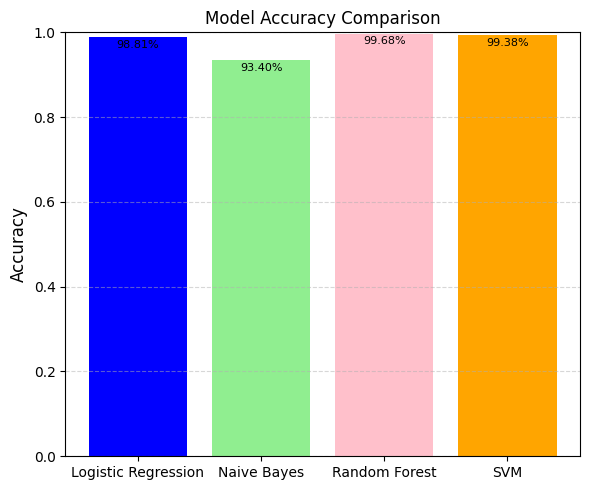

In [16]:
import matplotlib.pyplot as plt

# Define model names and their corresponding accuracies
model_names = ['Logistic Regression','Naive Bayes','Random Forest','SVM']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

# Create the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, accuracies, color=['blue', 'lightgreen', 'pink', 'orange'])

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-0.03,
             f'{acc:.2%}', ha='center', va='bottom', fontsize=8)

# Set chart title and labels
plt.title('Model Accuracy Comparison', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['processed_text'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['processed_text'])

# Pad sequences
max_length = 100
X = pad_sequences(sequences, maxlen=max_length, padding='post')

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**COMPILING LSTM MODEL And VALIDATION ACCURACY AND LOSS**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_length))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 65s 108ms/step - accuracy: 0.8416 - loss: 0.3595 - val_accuracy: 0.9565 - val_loss: 0.1118
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 77s 100ms/step - accuracy: 0.9714 - loss: 0.0986 - val_accuracy: 0.9744 - val_loss: 0.0830
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 73s 85ms/step - accuracy: 0.9851 - loss: 0.0614 - val_accuracy: 0.9781 - val_loss: 0.0714
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.9904 - loss: 0.0408 - val_accuracy: 0.9801 - val_loss: 0.0631
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.9935 - loss: 0.0289 - val_accuracy: 0.9785 - val_loss: 0.0700
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.9904 - loss: 0.0366 - val_accuracy: 0.9795 - val_loss: 0.0719
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9832 - loss: 0.0718 - val_accuracy: 0.9802 - val_loss: 0.0705
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 49s 87ms/step - accuracy: 0.9951 - loss: 0.0265 

**CLASSIFICATION REPORT**

In [20]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4650
           1       0.98      0.98      0.98      4330

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



**GRAPHS- Accuracy and Loss**

Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 50s 89ms/step - accuracy: 0.9915 - loss: 0.0378 - val_accuracy: 0.9736 - val_loss: 0.0870
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.9916 - loss: 0.0344 - val_accuracy: 0.9787 - val_loss: 0.0843
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 50s 88ms/step - accuracy: 0.9954 - loss: 0.0240 - val_accuracy: 0.9824 - val_loss: 0.0761
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 49s 87ms/step - accuracy: 0.9977 - loss: 0.0098 - val_accuracy: 0.9846 - val_loss: 0.0741
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.9969 - loss: 0.0128 - val_accuracy: 0.9832 - val_loss: 0.0662
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 51s 91ms/step - accuracy: 0.9981 - loss: 0.0077 - val_accuracy: 0.9836 - val_loss: 0.0691
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 51s 91ms/step - accuracy: 0.9988 - loss: 0.0054 - val_accuracy: 0.9837 - val_loss: 0.0807
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 50s 89ms/step - accuracy: 0.9998 - loss: 0.0017 - 

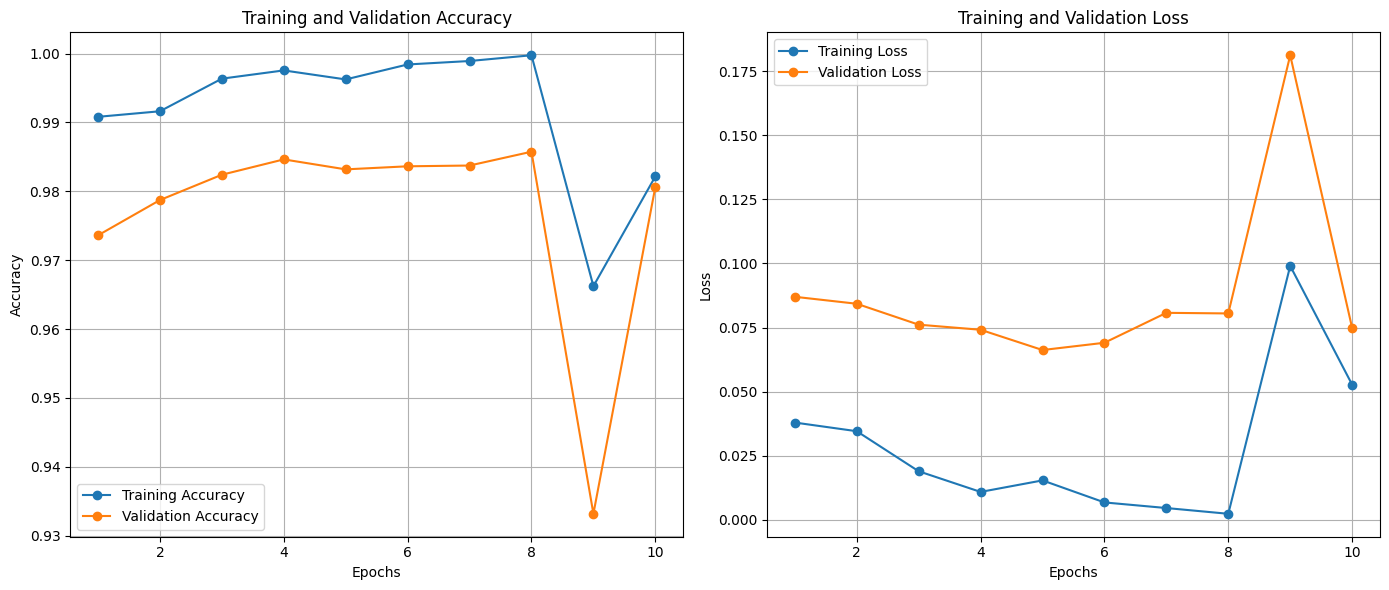

In [21]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 6))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**CONFUSION MATRIX**

281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step


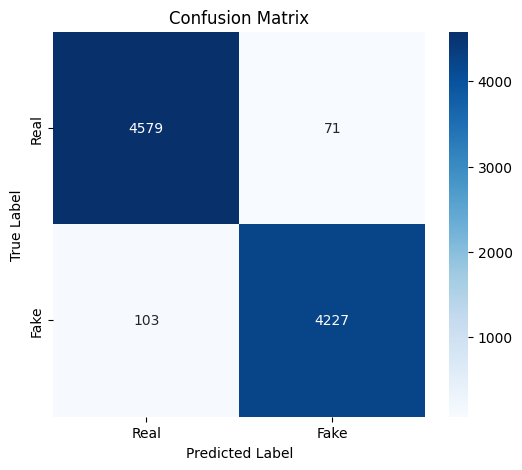

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import seaborn as sns # Import seaborn

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**TEST ACCURACY**

In [30]:
from sklearn.metrics import accuracy_score

# Assuming y_pred and y_test are already defined from your LSTM model
lstm_accuracy = accuracy_score(y_test, y_pred)
print(f"LSTM Accuracy: {lstm_accuracy}")

LSTM Accuracy: 0.9806236080178173
